# Cinemática Directa

La cinemática directa se realiza multiplicando las matrices de transformación homogénea de cada eslabón.

In [12]:
from sympy import symbols, sin, cos, pi, Matrix, atan2, solve, sqrt, acos

# Definir las variables
L1, L2, theta1, theta2 = symbols('L1 L2 theta1 theta2', real=True)

# Definir las matrices de transformación homogénea
A1 = Matrix([[cos(theta1), -sin(theta1), 0, L1*cos(theta1)],
             [sin(theta1), cos(theta1), 0, L1*sin(theta1)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

A2 = Matrix([[cos(theta2), -sin(theta2), 0, L2*cos(theta2)],
             [sin(theta2), cos(theta2), 0, L2*sin(theta2)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

# Calcular la matriz de transformación homogénea total
T = A1 * A2

# Extraer las coordenadas del extremo efectuador
x = T[0, 3]
y = T[1, 3]

# Sustituir valores específicos para las longitudes de los eslabones y los ángulos
L1_value = 1.0  # longitud del primer eslabón
L2_value = 1.0  # longitud del segundo eslabón
theta1_value = pi/4  # ángulo en radianes
theta2_value = pi/4  # ángulo en radianes

# Evaluar la posición del extremo efectuador
end_effector_position = (x.subs({L1: L1_value, L2: L2_value, theta1: theta1_value, theta2: theta2_value}),
                          y.subs({L1: L1_value, L2: L2_value, theta1: theta1_value, theta2: theta2_value}))
print("Cinemática Directa:", end_effector_position)

Cinemática Directa: (0.5*sqrt(2), 0.5*sqrt(2) + 1.0)


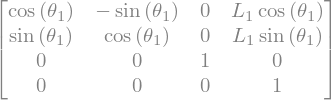

In [13]:
A1

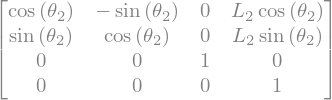

In [14]:
A2

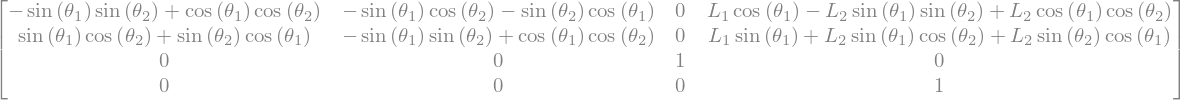

In [15]:
T

In [17]:
x

In [18]:
y

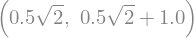

In [19]:
end_effector_position

# Cinemática Inversa

La cinemática inversa puede ser más compleja y, para un péndulo doble, puede tener múltiples soluciones.

In [21]:
from sympy import symbols, Eq, cos, sin, solve, atan2, acos, Matrix

# Definir las variables simbólicas
theta1, theta2, L1, L2, x, y = symbols('theta1 theta2 L1 L2 x y')

# Definir las matrices de transformación homogénea
A1 = Matrix([[cos(theta1), -sin(theta1), 0, L1*cos(theta1)],
             [sin(theta1), cos(theta1), 0, L1*sin(theta1)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

A2 = Matrix([[cos(theta2), -sin(theta2), 0, L2*cos(theta2)],
             [sin(theta2), cos(theta2), 0, L2*sin(theta2)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

# Calcular la matriz de transformación homogénea total
T = A1 * A2

# Extraer las coordenadas x, y del extremo efectuador de la matriz T
x_ef = T[0, 3]
y_ef = T[1, 3]

# Resolver las ecuaciones para theta1 y theta2
eq1 = Eq(x, x_ef)
eq2 = Eq(y, y_ef)

# Resolvemos para cos(theta2) usando la ley de los cosenos
cos_theta2 = solve(Eq(cos(theta2), ((x**2 + y**2 - L1**2 - L2**2)/(2*L1*L2))), theta2)

# Resolvemos para theta1 usando la solución de theta2
theta1_sol = atan2(y - L2*sin(cos_theta2[1]), x - L2*cos(cos_theta2[1])) - atan2(L2*sin(cos_theta2[1]), L1 + L2*cos(cos_theta2[1]))
theta2_sol = cos_theta2[1]

print("Soluciones para theta1 y theta2:", theta1_sol, theta2_sol)

Soluciones para theta1 y theta2: -atan2(L2*sqrt(1 - (-L1**2 - L2**2 + x**2 + y**2)**2/(4*L1**2*L2**2)), L1 + (-L1**2 - L2**2 + x**2 + y**2)/(2*L1)) + atan2(-L2*sqrt(1 - (-L1**2 - L2**2 + x**2 + y**2)**2/(4*L1**2*L2**2)) + y, x - (-L1**2 - L2**2 + x**2 + y**2)/(2*L1)) acos((-L1**2 - L2**2 + x**2 + y**2)/(2*L1*L2))


In [22]:
eq1

In [23]:
eq2

In [20]:
# Definir las posiciones del extremo efectuador como variables
x, y = symbols('x y', real=True)

# Calcular theta2 usando la ley de los cosenos
cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
theta2_sol = acos(cos_theta2)

# Calcular theta1
k1 = L1 + L2*cos(theta2_sol)
k2 = L2*sin(theta2_sol)
theta1_sol = atan2(y, x) - atan2(k2, k1)

# Sustituir los valores conocidos
theta1_value = theta1_sol.evalf(subs={x: end_effector_position[0], y: end_effector_position[1], L1: L1_value, L2: L2_value})
theta2_value = theta2_sol.evalf(subs={x: end_effector_position[0], y: end_effector_position[1], L1: L1_value, L2: L2_value})

print("Cinemática Inversa:", theta1_value, theta2_value)

Cinemática Inversa: 0.785398163397448 0.785398163397448


y

# Cinemática Directa

 la cinemática directa e inversa de un péndulo doble

In [6]:
from sympy import *
init_session()

IPython console for SymPy 1.12 (Python 3.11.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [7]:
from sympy import symbols, sin, cos, pi, Eq, solve, atan2, sqrt

# Definir las variables
L1, L2, theta1, theta2 = symbols('L1 L2 theta1 theta2', real=True)

# Calcular la posición del extremo efectuador
x1 = L1 * sin(theta1)
y1 = -L1 * cos(theta1)

x2 = x1 + L2 * sin(theta1 + theta2)
y2 = y1 - L2 * cos(theta1 + theta2)

# Reemplazar valores conocidos y resolver
theta1_value = pi/4  # ángulo en radianes
theta2_value = pi/4  # ángulo en radianes
L1_value = 1.0  # longitud del primer eslabón
L2_value = 1.0  # longitud del segundo eslabón

position = (x2.subs({theta1: theta1_value, theta2: theta2_value, L1: L1_value, L2: L2_value}),
            y2.subs({theta1: theta1_value, theta2: theta2_value, L1: L1_value, L2: L2_value}))

print("Cinemática Directa:", position)

Cinemática Directa: (0.5*sqrt(2) + 1.0, -0.5*sqrt(2))


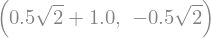

In [8]:
position

# Cinemática Inversa




In [9]:
# Definir las posiciones del extremo efectuador como variables
x, y = symbols('x y', real=True)

# Calcular theta2 usando la ley de los cosenos
cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
eq_theta2 = Eq(cos(theta2), cos_theta2)
sol_theta2 = solve(eq_theta2, theta2)

# Calcular theta1 usando las posiciones calculadas
eq_theta1 = Eq(atan2(y, x), atan2(L2 * sin(theta2), L1 + L2 * cos(theta2)) + theta1)
sol_theta1 = solve(eq_theta1.subs(theta2, sol_theta2[0]), theta1)  # Usar una de las soluciones de theta2

# Sustituir los valores conocidos
theta1_sol = sol_theta1[0].subs({x: position[0], y: position[1], L1: L1_value, L2: L2_value})
theta2_sol = sol_theta2[0].subs({x: position[0], y: position[1], L1: L1_value, L2: L2_value})

print("Cinemática Inversa:", theta1_sol, theta2_sol)

Cinemática Inversa: -atan(0.5*sqrt(2)/(0.5*sqrt(2) + 1.0)) + atan(1.0*sqrt(1 - (0.75 - 0.5*(0.5*sqrt(2) + 1.0)**2)**2)/(0.25 + 0.5*(0.5*sqrt(2) + 1.0)**2)) -acos(-0.75 + 0.5*(0.5*sqrt(2) + 1.0)**2) + 2*pi


Claro, podemos calcular tanto la cinemática directa como la inversa para un péndulo doble. Vamos a empezar con la cinemática directa:

### Cinemática Directa

La cinemática directa para un péndulo doble es bastante simple. Si tenemos dos longitudes de eslabones $ L_1 $ y $ L_2 $, y dos ángulos $ \theta_1 $ y $ \theta_2 $ medidos desde la vertical, las ecuaciones para las posiciones $ (x, y) $ de los extremos de cada eslabón son:

$$ x_1 = L_1 \sin(\theta_1) $$
$$ y_1 = -L_1 \cos(\theta_1) $$

$$ x_2 = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) $$
$$ y_2 = -L_1 \cos(\theta_1) - L_2 \cos(\theta_1 + \theta_2) $$

### Cinemática Inversa

La cinemática inversa es más complicada. Dada una posición del extremo $ (x, y) $, tenemos que encontrar los ángulos $ \theta_1 $ y $ \theta_2 $. Puedes usar las ecuaciones trigonométricas para encontrar estos ángulos, pero no siempre hay una solución única. Aquí está una forma de hacerlo:

1. **Resolver para $ \theta_2 $**

$$ \cos(\theta_2) = \frac{x^2 + y^2 - L_1^2 - L_2^2}{2 L_1 L_2} $$

2. **Resolver para $ \theta_1 $**

$$ \theta_1 = \arctan2(y, x) - \arctan2(L_2 \sin(\theta_2), L_1 + L_2 \cos(\theta_2)) $$

Donde $\arctan2$ es la función de arco tangente que da el ángulo correcto en el plano.



In [1]:
import numpy as np

# Definir las longitudes de los eslabones
L1 = 1.0
L2 = 1.0

# Cinemática Directa
def forward_kinematics(theta1, theta2):
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    
    x2 = x1 + L2 * np.sin(theta1 + theta2)
    y2 = y1 - L2 * np.cos(theta1 + theta2)
    
    return (x1, y1), (x2, y2)

# Cinemática Inversa
def inverse_kinematics(x, y):
    # Calcular theta2 usando la ley de los cosenos
    cos_theta2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2 = np.arccos(cos_theta2)
    
    # Calcular theta1
    theta1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))
    
    return theta1, theta2

# Probar la cinemática directa e inversa
theta1 = np.pi / 4  # 45 grados
theta2 = np.pi / 4  # 45 grados

# Calcular la posición del extremo usando cinemática directa
joint1_pos, end_effector_pos = forward_kinematics(theta1, theta2)
print("Cinemática Directa:", end_effector_pos)

# Calcular los ángulos usando cinemática inversa
calculated_theta1, calculated_theta2 = inverse_kinematics(*end_effector_pos)
print("Cinemática Inversa:", calculated_theta1, calculated_theta2)

Cinemática Directa: (1.7071067811865475, -0.7071067811865477)
Cinemática Inversa: -0.7853981633974485 0.7853981633974484


In [25]:
from sympy import symbols, cos, sin, Matrix, pi

# Definir las variables simbólicas
theta1, theta2, theta3, theta4, theta5, theta6 = symbols('theta1 theta2 theta3 theta4 theta5 theta6')
a1, a2, a3, d1, d2, d3, d4, d5, d6, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = symbols('a1 a2 a3 d1 d2 d3 d4 d5 d6 alpha1 alpha2 alpha3 alpha4 alpha5 alpha6')

# Definir las matrices de transformación homogénea
def transform_matrix(a, d, alpha, theta):
    return Matrix([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
                   [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
                   [0, sin(alpha), cos(alpha), d],
                   [0, 0, 0, 1]])

# Crear las matrices de transformación para cada articulación
T1 = transform_matrix(a1, d1, alpha1, theta1)
T2 = transform_matrix(a2, d2, alpha2, theta2)
T3 = transform_matrix(a3, d3, alpha3, theta3)
T4 = transform_matrix(0, d4, alpha4, theta4)
T5 = transform_matrix(0, d5, alpha5, theta5)
T6 = transform_matrix(0, d6, alpha6, theta6)

# Calcular la matriz de transformación homogénea total
T_total = T1 * T2 * T3 * T4 * T5 * T6



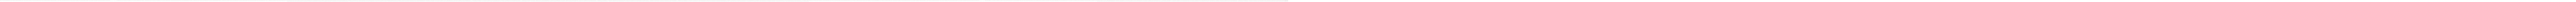

In [26]:
T_total

In [27]:
# Simplificar la matriz
T_total = T_total.simplify()

# Mostrar la matriz de transformación homogénea total
print(T_total)

KeyboardInterrupt: 

In [29]:
import sympy as sp

In [30]:
# Definir el ángulo de la articulación como una variable simbólica
theta = sp.symbols('theta')

# Definir la longitud del eslabón
l = 1  # Puedes cambiar esto a cualquier valor positivo

# Definir las coordenadas del punto objetivo
x_target = 2
y_target = 2


In [31]:
# Calcular las coordenadas del extremo del manipulador
x_end = l * sp.cos(theta)
y_end = l * sp.sin(theta)

# Definir la función de costo como la distancia cuadrada entre el extremo del manipulador y el punto objetivo
cost_function = (x_end - x_target)**2 + (y_end - y_target)**2


In [32]:
# Encontrar el valor de theta que minimiza la función de costo
optimal_theta_solution = sp.solve(sp.diff(cost_function, theta), theta)

# Evaluar la solución
optimal_theta = [sol.evalf() for sol in optimal_theta_solution]


In [33]:
print("Ángulo óptimo theta:", optimal_theta)


Ángulo óptimo theta: [-2.35619449019234, 0.785398163397448]


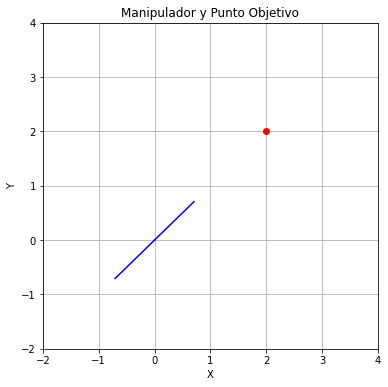

In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definir el ángulo de la articulación como una variable simbólica
theta = sp.symbols('theta')

# Definir la longitud del eslabón
l = 1  # Puedes cambiar esto a cualquier valor positivo

# Definir las coordenadas del punto objetivo
x_target = 2
y_target = 2

# Calcular las coordenadas del extremo del manipulador
x_end = l * sp.cos(theta)
y_end = l * sp.sin(theta)

# Definir la función de costo como la distancia cuadrada entre el extremo del manipulador y el punto objetivo
cost_function = (x_end - x_target)**2 + (y_end - y_target)**2

# Encontrar el valor de theta que minimiza la función de costo
optimal_theta_solution = sp.solve(sp.diff(cost_function, theta), theta)

# Evaluar la solución
optimal_theta = [float(sol.evalf()) for sol in optimal_theta_solution]

# Graficar
plt.figure(figsize=(6, 6))

# Graficar el manipulador en la posición óptima
for angle in optimal_theta:
    plt.plot([0, l * np.cos(angle)], [0, l * np.sin(angle)], 'b-')

# Graficar el punto objetivo
plt.plot(x_target, y_target, 'ro')

plt.xlim(-l-1, l+3)
plt.ylim(-l-1, l+3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manipulador y Punto Objetivo')
plt.grid(True)
plt.show()

In [2]:
%matplotlib notebook

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Definir el ángulo de la articulación como una variable simbólica
theta = sp.symbols('theta')

# Definir la longitud del eslabón
l = 1  # Puedes cambiar esto a cualquier valor positivo

# Definir las coordenadas del punto objetivo
x_target = 2
y_target = 2

# Calcular las coordenadas del extremo del manipulador
x_end = l * sp.cos(theta)
y_end = l * sp.sin(theta)

# Definir la función de costo como la distancia cuadrada entre el extremo del manipulador y el punto objetivo
cost_function = (x_end - x_target)**2 + (y_end - y_target)**2

# Encontrar el valor de theta que minimiza la función de costo
optimal_theta_solution = sp.solve(sp.diff(cost_function, theta), theta)

# Evaluar la solución y convertirla a un valor numérico (float)
optimal_theta = float(optimal_theta_solution[0].evalf())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-l-1, l+3)
ax.set_ylim(-l-1, l+3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)

# Graficar el punto objetivo
ax.plot(x_target, y_target, 'ro')

# Inicializar la línea que representará el manipulador
line, = ax.plot([], [], 'b-')

# Función de inicialización para la animación
def init():
    line.set_data([], [])
    return line,

# Función de actualización para la animación
def update(frame):
    angle = frame * optimal_theta / 30  # Dividir el ángulo óptimo en 30 pasos
    x = l * np.cos(angle)
    y = l * np.sin(angle)
    line.set_data([0, x], [0, y])
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=31, init_func=init, blit=True)

plt.show()


<IPython.core.display.Javascript object>

In [13]:
#!pip install plotly

#!pip install pandas


In [14]:
#import plotly.express as px
#df = px.data.gapminder()
#fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
#size="pop", color="continent", hover_name="country",
#log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
#
#fig["layout"].pop("updatemenus") # optional, drop animation buttons
#fig.show(renderer='notebook')

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,.1)

plt.plot(x,x**2)
plt.show()

<IPython.core.display.Javascript object>

In [5]:
#!pip install ipympl

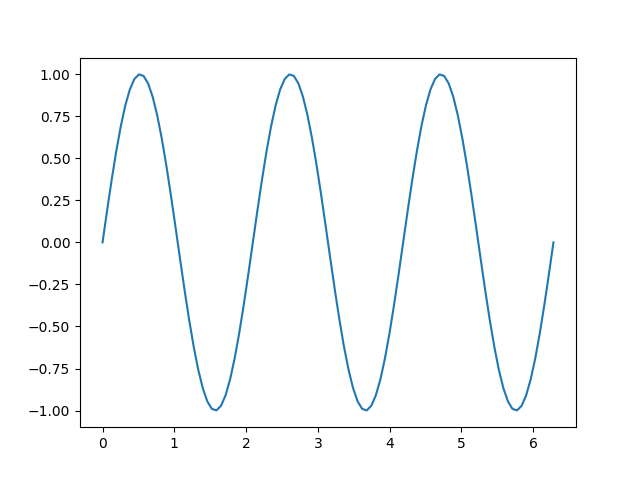

In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

In [23]:
fig, ax = plt.subplots()

<IPython.core.display.Javascript object>